#### Regression linéaire simple
- Contexte : relation linéaire entre heures d'étude par semaine (X) et taux de réussite (%) (y).
- Modèle estimé : 
    y_estim = w_0 + w_1*x


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Génération de jeu de données

X = np.array([1.5, 2.0, 3.0, 4.5, 5.0, 6.0, 6.5, 7.5, 8.0, 9.0, 10.0, 11.5, 13.0, 15.0, 18.0])


In [45]:
# Générer un plus grand nombre de points entre le min et le max
X_aug = np.linspace(X.min(), X.max(), 50)  # 50 points uniformément répartis

# Ajouter un petit bruit aléatoire pour rendre les données plus réalistes
np.random.seed(42)
X_aug += np.random.normal(0, 0.2, X_aug.shape) 
print(X_aug)



[ 1.59934283  1.80908183  2.3030071   2.81481005  2.8001081   3.13684608
  3.83625073  4.0106298   4.09998267  4.63912425  4.7746634   5.11093568
  5.58920878  5.49489497  5.86930215  6.4385629   6.68518888  7.28733926
  7.37961967  7.61549844  8.52782363  8.52627331  8.92166891  8.95994832
  9.47275611  9.94055186 10.02490333 10.66697634 10.80844369 11.20696737
 11.48169949 12.30923115 12.27281076 12.40070271 13.11348857 13.04154556
 13.6642217  13.56724965 14.03028116 14.67202531 15.11708107 15.34039611
 15.61972749 15.9193711  16.02062213 16.50909238 16.89766816 17.53795506
 17.73198896 17.64739197]


In [46]:
X = np.copy(X_aug)

In [47]:

#vrai relation entre X et y avec un peu de bruit
# valeurs tirées d'une distribution normale centrée en 0 et d'écart-type =4.0

y = 30 +2.5*X + np.random.normal(scale=4.0, size=X.shape) # le bruit a la m^me dimension que X

#préparer la matrice d'entrée
X_design = np.vstack([np.ones_like(X), X]).T  # Ajout de la colonne de biais

#calcule analytique des coefficients w = (X^T X)^(-1) X^T y

XtX = X_design.T.dot(X_design)
XtX_inv= np.linalg.inv(XtX)
w =  XtX_inv.dot(X_design.T).dot(y)

# prédiction
y_pred = X_design.dot(w)
mse=np.mean((y - y_pred)**2)

In [48]:
#on affiche els résultats :
print(f"Paramètres estimés : w0 = {w[0]:.5f}, w1 ={w[1]:.5f}")
print(f"Erreur quadratique moyenne (MSE) = {mse:.4f}")

Paramètres estimés : w0 = 30.76796, w1 =2.42820
Erreur quadratique moyenne (MSE) = 11.8663


On remarque que le biais d'estimation est élevé

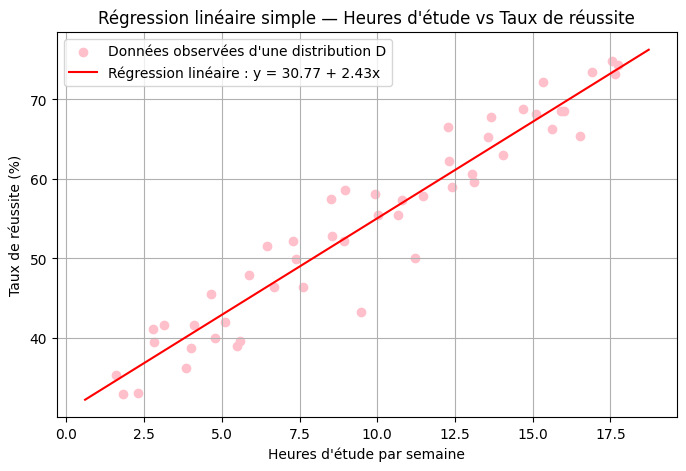

In [49]:
# traçons le nuage des point et visualisons la droite de regression
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='pink', label='Données observées d\'une distribution D')

# créer une ligne pour tracer la droite proprement
X_line = np.linspace(X.min()-1, X.max()+1, 100)
X_line_des = np.vstack([np.ones_like(X_line), X_line]).T
y_line = X_line_des.dot(w)

plt.plot(X_line, y_line,color='red', label=f"Régression linéaire : y = {w[0]:.2f} + {w[1]:.2f}x ")
plt.xlabel("Heures d'étude par semaine")
plt.ylabel("Taux de réussite (%)")
plt.title("Régression linéaire simple — Heures d'étude vs Taux de réussite")
plt.legend()
plt.grid(True)
plt.show()  


In [50]:
# comparaison entre les paramètres trouvés:
df = pd.DataFrame({
    "heures_etude": X,
    "taux_reussite_observe": np.round(y, 2),
    "taux_reussite_pred": np.round(y_pred, 2),
    "erreur": np.round(y - y_pred, 2)
 })
df.index.name = "échantillon"
print("\nAperçu des données :")
df


Aperçu des données :


,heures_etude,taux_reussite_observe,taux_reussite_pred,erreur
échantillon,,,,
0,1.599343,35.29,34.65,0.64
1,1.809082,32.98,35.16,-2.18
2,2.303007,33.05,36.36,-3.31
3,2.814810,39.48,37.60,1.88
4,2.800108,41.12,37.57,3.56
5,3.136846,41.57,38.38,3.18
6,3.836251,36.23,40.08,-3.85
7,4.010630,38.79,40.51,-1.72
8,4.099983,41.58,40.72,0.85


### Comment optimiser la fonction de perte / réduire l’erreur

Si on reste dans le cadre de la régression linéaire classique, voici les stratégies :

a. Augmenter le nombre d’échantillons

Plus de points 
X → moyenne du bruit plus stable → paramètres estimés plus proches des vrais w0, w1.
Mathématiquement : la variance de l’estimateur w diminue quand n augmente.

b. Réduire le bruit de mesure

Si possible, diminuer l’écart-type du bruit dans les données générées (ou obtenir des mesures plus précises dans la vraie vie).

Moins de bruit → solution analytique plus proche des vrais paramètres.

c. Utiliser une descente de gradient avec régularisation (Ridge/Lasso)

Même si la solution analytique existe, on peut utiliser des méthodes numériques avec régularisation pour stabiliser l’estimation si certaines features sont colinéaires.

In [51]:
# ce qui ce passe en arrière plan de LinearRegression

from sklearn.linear_model import LinearRegression

X = X.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)
y_pred_linear_reg= model.predict(X)

print(f"Le biais d'estimation : {model.intercept_:.4f}")
print(f"Coefficient w1 : {model.coef_[0]}")


Le biais d'estimation : 30.7680
Coefficient w1 : 2.4281979459514855


### Comment fonctionne `LinearRegression` en arrière-plan

1. **Préparation des données**
   - Si `fit_intercept=True`, scikit-learn ajoute automatiquement une **colonne de 1** à $X$ pour représenter le biais $w_0$.
   - Chaque ligne de $X$ correspond à un **échantillon**, chaque colonne à une **feature**.

2. **Calcul des coefficients (solution analytique)**
   - LinearRegression résout la formule des moindres carrés :
   $$
   \mathbf{w} = (X^\top X)^{-1} X^\top \mathbf{y}
   $$
   - Ici :
     - $w_0$ est le **biais** (*intercept*)
     - $(w_1, w_2, \dots,  w_n)$ sont les **coefficients des features**
   - Dans le code source, cette équation est souvent résolue via `np.linalg.lstsq` pour plus de **stabilité numérique**.

3. **Stockage des résultats**
   - `model.coef_` → vecteur des coefficients des features $[w_1, w_2, \dots]$
   - `model.intercept_` → valeur du biais $w_0$

4. **Prédiction**
   - `model.predict(X)` effectue le produit matriciel :
   $$
   \hat{\mathbf{y}} = X \cdot \mathbf{w} + w_0
   $$
   - Retourne les valeurs prédites \(\hat{y}\) pour chaque échantillon.

5. **Exemple de matrice de design pour une seule feature**
   $$
   X_{\text{design}} =
   \begin{bmatrix}
   1 & x_1 \\
   1 & x_2 \\
   \vdots & \vdots \\
   1 & x_n
   \end{bmatrix}, \quad
   \mathbf{w} =
   \begin{bmatrix}
   w_0 \\
   w_1
   \end{bmatrix}
   $$
   - Chaque ligne correspond à un échantillon, la première colonne de 1 sert à multiplier le **biais** $w_0$, la deuxième colonne contient la feature réelle $x_i$.


### Régression Ridge : rappel théorique

La régression Ridge est une extension de la régression linéaire qui ajoute un terme de **régularisation** afin d'éviter le sur-apprentissage et de réduire l’influence des points extrêmes.

Le modèle linéaire reste le même :

$$\hat{y}_i = w_0 + w_1 x_i$$

mais l’objectif d’apprentissage devient :

$$\min_{w_0, w_1} J(w) = \frac{1}{n} \sum_{i=1}^{n} \big(y_i - (w_0 + w_1 x_i)\big)^2 + \lambda \sum_{j=1}^{p} w_j^2$$

où :

- $y_i$ : valeur observée  
- $x_i$ : variable explicative  
- $w_0, w_1$ : coefficients à apprendre  
- $\lambda \ge 0$ : paramètre de régularisation  
- Le terme $\lambda \sum_{j=1}^{p} w_j^2$ **pénalise les grandes valeurs des coefficients**, ce qui stabilise le modèle.

> Remarque : si $\lambda = 0$, on retrouve la régression linéaire classique.


In [52]:
# implémentation de Ridge

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

#X = np.array([1.5, 2.0, 3.0, 4.5, 5.0, 6.0, 6.5, 7.5, 8.0, 9.0, 10.0, 11.5, 13.0, 15.0, 18.0])
#X_reshaped = X.reshape(-1,1)
#y= y = 30 +2.5*X + np.random.normal(scale=4.0, size=X.shape) # le bruit a la m^me dimension que X

X = df[['heures_etude']].values
y = df['taux_reussite_observe'].values
#regression Ridge avec lambda = alpha = 1.0

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

# Prédictions
y_pred_ridge = ridge_model.predict(X)

# Erreur MSE
mse_ridge = mean_squared_error(y, y_pred_ridge)
print(f"MSE Ridge: {mse_ridge:.4f}")

MSE Ridge: 11.8659


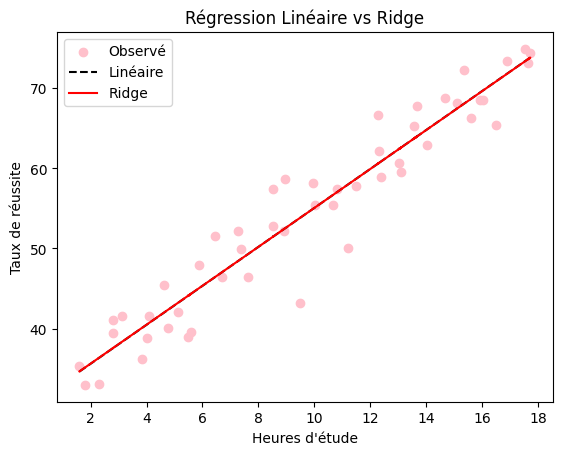

In [ ]:
# Comparaison avec la régression linéaire classique


# Tracé
plt.scatter(X, y, color='pink', label='Observé')
plt.plot(X, y_pred_linear_reg, color='black', linestyle='--', label='Linéaire')
plt.plot(X, y_pred_ridge, color='red', label='Ridge')
plt.xlabel('Heures d\'étude')
plt.ylabel('Taux de réussite')
plt.title('Régression Linéaire vs Ridge')
plt.legend()
plt.show()

#presque la meme chose (superposés) car la dataset est petite

In [56]:
print(f"Erreur quadratique moyenne (MSE) = {mse:.4f}")
print(f"Erreur quadratique moyenne (MSE) = {mse_ridge:.4f}")

Erreur quadratique moyenne (MSE) = 11.8663
Erreur quadratique moyenne (MSE) = 11.8659
